In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from pathlib import Path
import copy

import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

In [6]:
dir_github = Path(r'D:\RH_local\github').resolve()

# dir_analysisFiles = Path(r'/media/rich/bigSSD/data_raw/BMI/mouse_2_6').resolve()
# dir_analysisFiles = Path(r'/media/rich/bigSSD/data_raw/BMI/mouse_g8test/20230314/analysis_data/').resolve()
# dir_analysisFiles = Path(r'/media/rich/bigSSD/data_raw/BMI/mouse_g8test').resolve()
dir_analysisFiles = Path(r'/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/').resolve()

## Directory with F.npy, stat.npy etc.
# dir_s2p         = Path(r'/media/rich/bigSSD/data_raw/BMI/mouse_2_6/statFiles/20210409').resolve()
# dir_s2p         = Path(r'/media/rich/bigSSD/data_raw/BMI/mouse_g8test/20230314/analysis_data/suite2p/plane0').resolve()
# dir_s2p         = Path(r'/media/rich/bigSSD/data_raw/BMI/mouse_g8test/mouse_g8t/jobNum_0/suite2p/plane0').resolve()
dir_s2p_outer         = Path(r'/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/').resolve()

# ## Path of iscell. Can be from neural net output (iscell_NN)
# # path_iscell = dir_analysisFiles / 'iscell_NN.npy'
# path_iscell = dir_analysisFiles / 'drawn_roi_classification_output.pkl'

## Directory to save outputs into
dir_save = dir_analysisFiles

In [22]:
# import sys
# sys.path.append(str(dir_github))

%load_ext autoreload
%autoreload 2

# from basic_neural_processing_modules import ca2p_preprocessing, file_helpers
from bnpm import ca2p_preprocessing, file_helpers, path_helpers
import bnpm.path_helpers, bnpm.file_helpers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
use_multiple_sessions = True

if use_multiple_sessions:
    %load_ext autoreload
    %autoreload 2
    import roicat
    path_roicat_tracking       = r'/home/rich/Desktop/mouse_0322R.ROICaT.tracking.results.DAY0.pkl'
    path_roicat_classification = r'/home/rich/Desktop/mouse_0322R.ROICaT.classification_drawn.results.DAY0.pkl'
    
    results_roicat_tracking       = bnpm.file_helpers.pickle_load(str(Path(path_roicat_tracking).resolve()))
    results_roicat_classification = bnpm.file_helpers.pickle_load(str(Path(path_roicat_classification).resolve()))    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
filepaths_F = bnpm.path_helpers.find_paths(
    dir_outer=dir_s2p_outer,
    reMatch='F.npy',
    depth=3,
)
print(f'filepaths with F.npy: {filepaths_F}')

dirs_s2p = [str(Path(p).parent) for p in filepaths_F]

filepaths with F.npy: ['/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230419/F.npy', '/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230420/F.npy']


In [68]:
## == IMPORT DATA ==
outs = [ca2p_preprocessing.import_s2p(d) for d in dirs_s2p]

iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230419
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230420


In [69]:
## Concatenate sessions into a single combined session

In [70]:
F_all, Fneu_all, iscell_s2p_all, ops_all, spks_s2p_all, stat_all = ([o[ii] for o in outs] for ii in range(len(outs[0])))

In [140]:
ucids = results_roicat_tracking['UCIDs_bySession']
iscell_roicat = results_roicat_classification['preds']
dicts_matching = [{val: np.where(u == val)[0][0] for ii, val in enumerate(ucids[0]) if (val>=0 and all([ic[ii]>0 for ic in iscell_roicat]))} for u in ucids]  ## makes a dictionary where each element is a session. Each key is a UCID. Only UCIDs that are not -1, and are iscell in all sessions are included.

In [173]:
ucids_iscell_fullMatch = roicat.util.discard_UCIDs_with_fewer_matches(
    ucids=roicat.util.mask_UCIDs_with_iscell(
        ucids=results_roicat_tracking['UCIDs_bySession'],
        iscell=results_roicat_classification['preds'],
    ),
    n_sesh_thresh='all',
)

INFO: 93.37% of UCIDs in first session appear in at least 2 sessions.


In [174]:
ucids_iscell_fullMatch

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  -1,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  -1,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  -1,
  35,
  -1,
  -1,
  38,
  39,
  -1,
  -1,
  -1,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  -1,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  -1,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  -1,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  -1,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  -1,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  -1,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  -1,
  137,
  -1,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  -1,
  -1,
  149,
  150,
  151,
  152,
  -1,
  154,
  155,
  156,
  157,
  158,
  -1

In [175]:
# labels = [c*t - (np.logical_not(c)) for c,t in zip(results_roicat_classification['preds'], results_roicat_tracking['UCIDs_bySession'])]
# labels = [(np.ones(len(u))*-1).astype(np.int64) for u in ucids]
# labels = [key]

FOVs_colored = roicat.visualization.compute_colored_FOV(
    spatialFootprints=results_roicat_tracking['ROIs']['ROIs_aligned'], 
    FOV_height=results_roicat_tracking['ROIs']['frame_height'], 
    FOV_width=results_roicat_tracking['ROIs']['frame_width'], 
#     labels=results_tracking['UCIDs_bySession'], 
    labels=ucids_iscell_fullMatch,
)

<IPython.core.display.Javascript object>


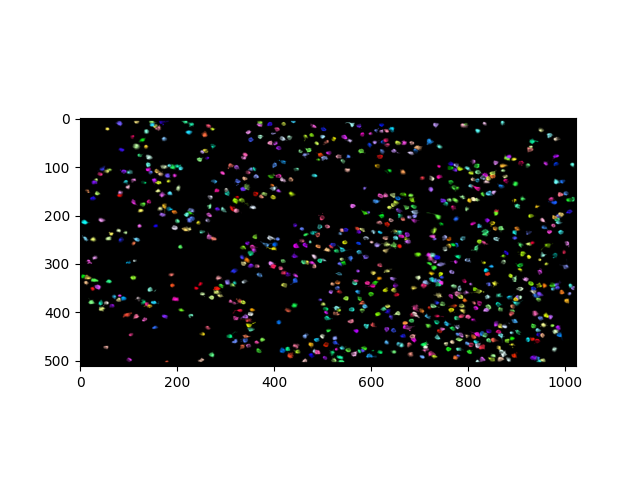

interactive(children=(IntSlider(value=0, description='i_frame', max=1), Output()), _dom_classes=('widget-inter…

In [176]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(FOVs_colored)

In [247]:
test = np.stack(roicat.util.match_arrays_with_ucids(F_all, ucids_iscell_fullMatch), axis=0)

In [259]:
idx.stop

10

<IPython.core.display.Javascript object>


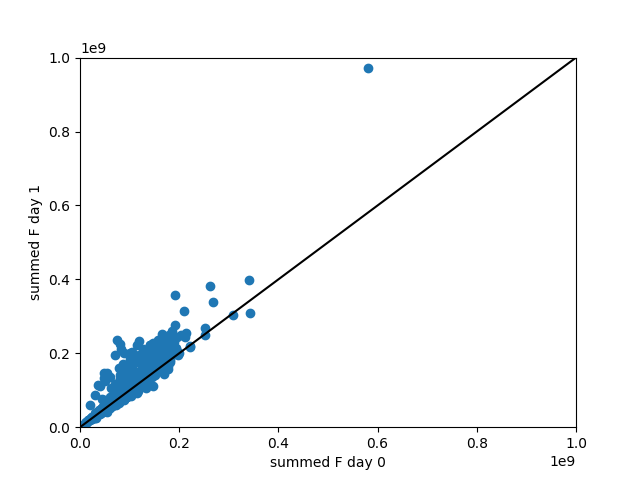

Text(0, 0.5, 'summed F day 1')

In [270]:
plt.figure()
plt.scatter(np.sum(test, axis=2)[0], np.sum(test, axis=2)[1])
plt.xlim([0,1e9])
plt.ylim([0,1e9])
plt.plot([0,1e9], [0, 1e9], 'k')
plt.xlabel('summed F day 0')
plt.ylabel('summed F day 1')

<IPython.core.display.Javascript object>


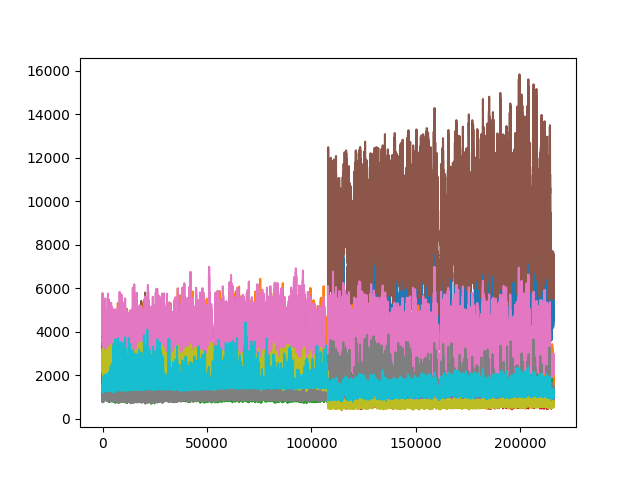

In [261]:
idx = slice(0,10)
plt.figure()
plt.plot(test[:,idx,:].reshape(idx.stop - idx.start, test.shape[2]*test.shape[0]).T)

In [222]:
results_roicat_tracking['ROIs']['ROIs_aligned'][0][0]

<1x524288 sparse matrix of type '<class 'numpy.float32'>'
	with 134 stored elements in Compressed Sparse Row format>

In [182]:
roicat

<module 'roicat' from '/media/rich/Home_Linux_partition/github_repos/ROICaT/roicat/__init__.py'>

In [178]:
np.full_like(F_all[0], fill_value=np.nan, dtype=F_all[0].dtype)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [ ]:
[np.where((ucids_byDate[date] == val) * (val>=0))[0] for val in ucids_decoderVector]

In [ ]:
idx_matching_decoderVector = {date: np.array([val[0] if len(val)==1 else -1 for val in arr], dtype=np.int64) for date, arr in idx_matching_decoderVector_raw.items()}

In [ ]:
F_matched = {}
for date,F in F_objs.items():
    idx = idx_matching_decoderVector[date]
    arr = F[idx]
    arr[idx==-1] = arr[idx==-1] * np.nan
    F_matched.update({date: arr})

In [ ]:
np.array([val[0] if len(val)==1 else -1 for val in arr], dtype=np.int64)

In [ ]:
F_matched = 

In [15]:
# F, Fneu, iscell_s2p, ops, spks_s2p, stat = ca2p_preprocessing.import_s2p(dir_s2p)
n_frames, n_rois = F.shape[1], F.shape[0]
Fs = ops['fs']

iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230419
iscell.npy not found in /media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230420


In [6]:
# iscell = np.load(path_iscell)
path_iscell = path_helpers.find_paths(dir_outer=dir_analysisFiles, reMatch='roi_classification')[0]
iscell = file_helpers.pickle_load(path_iscell)['preds'][0].astype(np.bool8)

In [7]:
F_toUse = F[iscell]
Fneu_toUse = Fneu[iscell]

In [8]:
# # Oopsie!
# # Mouse g2FB: delete 43000 - 50000 frames
# F_toUse = np.delete(F_toUse, range(43000,50000), axis=1)
# Fneu_toUse = np.delete(Fneu_toUse, range(43000,50000), axis=1)

In [9]:
# channelOffset_correction = 0
percentile_baseline = 30
neuropil_fraction=0.7

dFoF , dF , F_neuSub , F_baseline = ca2p_preprocessing.make_dFoF(
    F=F_toUse,
    Fneu=Fneu_toUse,
    neuropil_fraction=neuropil_fraction,
    percentile_baseline=percentile_baseline,
    rolling_percentile_window=None,
    multicore_pref=True,
    verbose=True
)

dFoF_params = {
    "channelOffset_correction": 0,
    "percentile_baseline": percentile_baseline,
    "neuropil_fraction": neuropil_fraction,
}

Calculated dFoF. Total elapsed time: 8.1 seconds


In [10]:
# dFoF with reduced percentile for baseline
channelOffset_correction = 0
percentile_baseline = 30
neuropil_fraction = 0.7
win_rolling_percentile = 15*60*30

dFoF_rollingPtile, dF_rollingPtile, F_neuSub_rollingPtile, F_baseline_rollingPtile = ca2p_preprocessing.make_dFoF(
    F=F_toUse,
    Fneu=Fneu_toUse,
    neuropil_fraction=neuropil_fraction,
    percentile_baseline=percentile_baseline,
    rolling_percentile_window=win_rolling_percentile,
    multicore_pref=True,
    verbose=True
)
# # Threshold for nonnegativity
# dFoF_z = dFoF / np.std(dFoF,axis=1,keepdims=True)

dFoF_params = {
    "channelOffset_correction": 0,
    "percentile_baseline": percentile_baseline,
    "neuropil_fraction": neuropil_fraction,
}

100%|███████████████████████████████████████████| 36/36 [00:10<00:00,  3.35it/s]


Calculated dFoF. Total elapsed time: 13.23 seconds


<IPython.core.display.Javascript object>


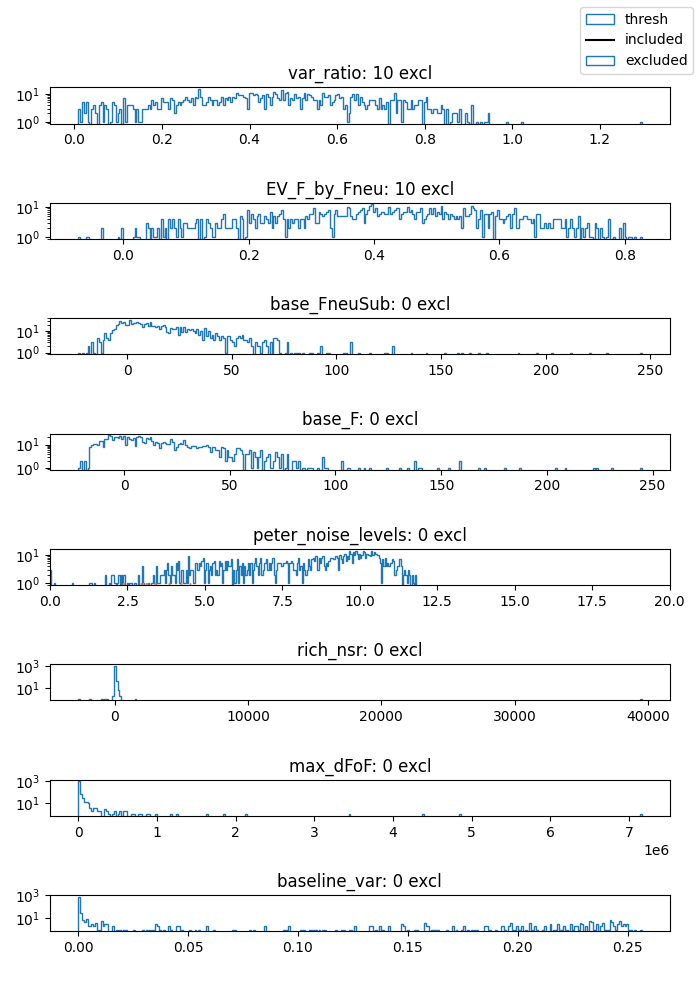

<IPython.core.display.Javascript object>


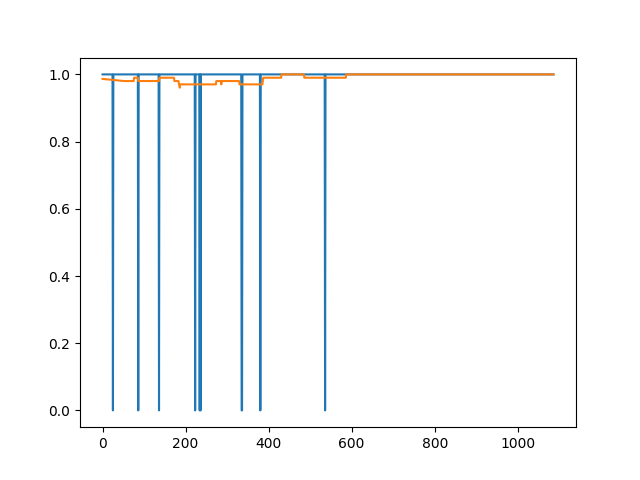

ROIs excluded: 10 / 1087
ROIs included: 1077 / 1087


In [13]:
%matplotlib notebook

# thresh = {
#     'var_ratio': 0.4,
#     'EV_F_by_Fneu': 0.5,
#     'base_FneuSub': 200,
#     'base_F': 100,
#     'peter_noise_levels': 5,
#     'rich_nsr': 7,
#     'max_dFoF': 10,
#     'baseline_var': 0.0003,
# }

thresh = {
            'var_ratio': np.inf,
            'EV_F_by_Fneu': np.inf,
            'base_FneuSub': -np.inf,
            'base_F': -np.inf,
            'peter_noise_levels': np.inf,
            'rich_nsr': np.inf,
            'max_dFoF': np.inf,
            'baseline_var': np.inf,
        }
    
tqm, iscell_tqm = ca2p_preprocessing.trace_quality_metrics(
    F_toUse,
    Fneu_toUse,
    dFoF_rollingPtile,
    dF_rollingPtile,
    F_neuSub,
    F_baseline,
    percentile_baseline=percentile_baseline,
    Fs=Fs,
    plot_pref=True,
    thresh=thresh,
    clip_range=(-1,1)
)
idxROI_tqm_toInclude = np.where(iscell_tqm)[0]
idxROI_tqm_toExclude = np.where(~iscell_tqm)[0]

In [14]:
iscell_tqm

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
np.where(iscell_tqm==False)[0]

array([ 25,  86, 136, 223, 234, 236, 335, 336, 380, 536])

<IPython.core.display.Javascript object>


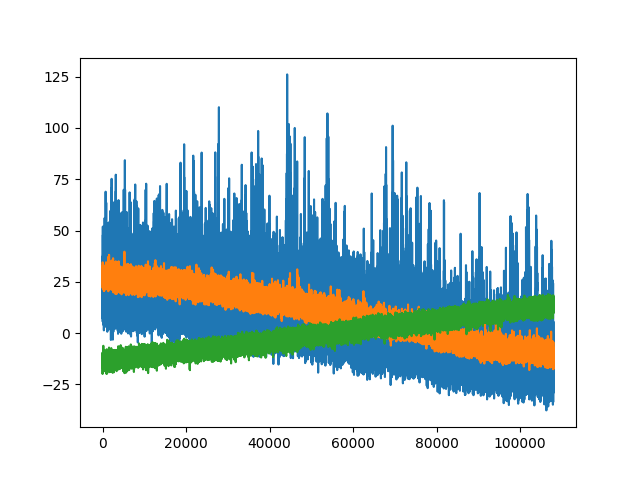

In [29]:
idx = 136

plt.figure()
plt.plot(F[idx])
plt.plot(Fneu[idx])
plt.plot(F_neuSub[idx])

In [27]:
np.argsort(F[:,-1])[:100]

array([ 749, 2026, 1039,  408, 2364, 2196, 1283, 1839, 1464, 2175, 1842,
       2315, 2476,  258, 2029, 2376, 1595, 1649, 1858, 2232, 2369, 2457,
       1600, 2195, 2466, 2482, 2399, 2049, 2452, 2503, 2475, 2586, 2536,
         10, 2201, 2314, 2525, 2461, 2281, 2347, 1865, 2327, 1705, 1919,
       2172, 2310, 2448, 2299, 2555, 2053,  680, 2508, 1917, 2185,  389,
       2487, 2119,  192, 1964, 1475, 2402, 1584, 1943, 2335, 2441, 1793,
        101, 2496, 2199, 1536, 1622, 1844, 1145, 1095,  163, 1408, 2291,
       2297, 2473, 2219, 1915, 2156,  998, 2360, 2137, 1277, 1487, 2597,
        434,  362, 1929, 1344,  384, 1818, 2169, 2002, 2440,  399, 1559,
       2230])

In [16]:
iscell_new = copy.copy(iscell)
iscell_new[iscell_new] = iscell_tqm

In [17]:
file_helpers.pickle_save(
    obj={
        "tqm": tqm,
        "iscell_tqm": iscell_tqm,
        "dFoF_params": dFoF_params
    },
    path_save=dir_save / 'trace_quality.pkl'
)

np.save(
    file= dir_save / 'iscell_NN_tqm.npy',
    arr=iscell_new
)